# Modeling
Matthew Mandel Hemsley

### Remember: Churn in this dataset represents individuals who left within the last month
Additionally, Accuaracy and Precision will be our most important metrics as we are attempting to minimize Type 2 Errors

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
#Original Cleaned Kaggle Dataset
churn_df = pd.read_csv('./data/clean_churn.csv')

#Feature Engineered Dataset
eng_churn_df = pd.read_csv('./data/feature_engineered_churn.csv')

To begin, let's review our dataset and make sure it imported correctly.

In [3]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,2,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,2,1,2,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,2,2,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,2,1,2,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [4]:
eng_churn_df.head()

,customerID,SeniorCitizen,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Streaming,Online_Support,Technical_Support,Internet_Service,Contract
0,7590-VHVEG,0,0,1,0,1,29.85,29.85,0,0,1,0,1,0
1,5575-GNVDE,0,0,34,1,0,56.95,1889.50,0,0,1,1,1,1
2,3668-QPYBK,0,0,2,1,1,53.85,108.15,1,0,1,0,1,0
3,7795-CFOCW,0,0,45,0,0,42.30,1840.75,0,0,1,1,1,1
4,9237-HQITU,0,0,2,1,1,70.70,151.65,1,0,0,0,1,0


In [5]:
#Setting index to customerID
churn_df.set_index('customerID',inplace=True)
eng_churn_df.set_index('customerID',inplace=True)

## Train/Test Split
We will be using all the features in our dataset to predict our y, Churn. Additionally, we will be stratifing during our train/test split in order to offset our imbalanced Churn class.

In [6]:
#Train/Test Split
X = churn_df.drop(columns=['Churn'])
y = churn_df['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, stratify=y)

In [7]:
#Scaling our data
stan = StandardScaler()
X_sc_train = stan.fit_transform(X_train)
X_sc_test = stan.transform(X_test)

We will do the same to our feature engineered dataset so we can examine the impact alongside the original dataset.

In [8]:
#Train/Test Split 2: Electric Boogaloo
X_eng = eng_churn_df.drop(columns=['Churn'])
y_eng = eng_churn_df['Churn']
X_eng_train,X_eng_test,y_eng_train,y_eng_test = train_test_split(X_eng,y_eng, random_state=42, stratify=y)

In [9]:
#Scaling Engineered Train/Test
stan = StandardScaler()
X_sc_eng_train = stan.fit_transform(X_eng_train)
X_sc_eng_test = stan.transform(X_eng_test)

## Logistic Regression
We are just going to fit to a standard logistic regression model to create a baseline for us to compare our future models with. While we could simply use a standard of 50%, one of the goals of this notebook is to compare models and statistical techiniques across the same churn dataset. As we will see, a logistic regression model with default parameters scores very well on our dataset as is, so our challenge will be to not only develop a better model, but also identify which features contribute to higher accuracy and recall metrics, which will be our primary comparisons for our models.

In [10]:
#Instantiate/Fit/Score Default Logistic Regression Model
logit = LogisticRegression()
logit.fit(X_sc_train,y_train)

eng_logit = LogisticRegression()
eng_logit.fit(X_sc_eng_train,y_eng_train)

LogisticRegression()

In [11]:
print(f'Training Accuracy: {logit.score(X_sc_train,y_train):.2%}')
print(f'Testing Accuracy: {logit.score(X_sc_test,y_test):.2%}')
print()
print(f'Engineered Training Accuracy: {eng_logit.score(X_sc_eng_train,y_eng_train):.2%}')
print(f'Engineered Testing Accuracy: {eng_logit.score(X_sc_eng_test,y_eng_test):.2%}')

Training Accuracy: 80.39%
Testing Accuracy: 80.60%

Engineered Training Accuracy: 80.07%
Engineered Testing Accuracy: 80.20%


We can see from these scores that not only does our logistic regression model predict 80% of the varience of our data, but our model is relatively fit, though clearly there is room for improvement. 

In [12]:
#Generate Predictions
preds = logit.predict(X_sc_test)
eng_preds = eng_logit.predict(X_sc_eng_test)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.65      0.57      0.61       467

    accuracy                           0.81      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



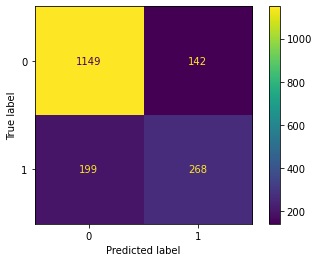

In [13]:
print(classification_report(y_test,preds))
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = logit.classes_).plot();

The above confusion matrix shows a breakdown of our predictions. Our model predicted we would churn 410 customers. Of those predicted, 268 were correct. 199 customers churned out of 1149 we predicted would not churn. 

C:\Users\Matthew\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


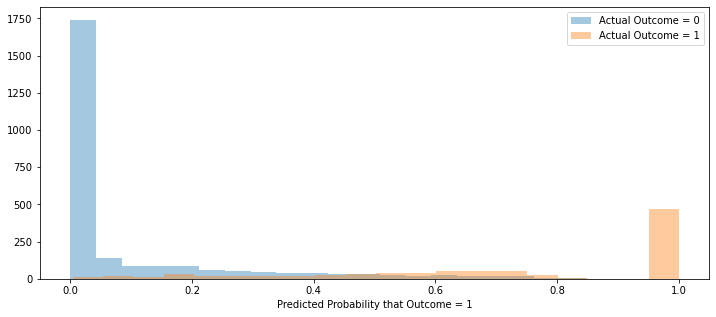

In [14]:
pred_df = pd.DataFrame({'true_values':y_test,
                        'pred_proba': logit.predict_proba(X_sc_test)[:,1]})

plt.figure(figsize = (12, 5))

# plot distributions of predicted probabilities by actual values
for group in pred_df.groupby('true_values'):
    sns.distplot(group[1], kde = False, bins = 20, label = f'Actual Outcome = {group[0]}');

plt.xlabel('Predicted Probability that Outcome = 1');
plt.legend();

While this is helpful in visualizing our data distribution, we will be using the Area Under the Receiver Operating Characteristics, or AUC-ROC Curve.

In [15]:
#AUC-ROC Curve Function
def plot_aucroc_curve(model,X_test,y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0,1],[0,1], label ='No Seperation',linestyle='--')
    plt.title(str(model)+' AUC-ROC Curve')
    plt.legend();
    plt.savefig('./assets/'+str(model)+'_AUCROC.png');

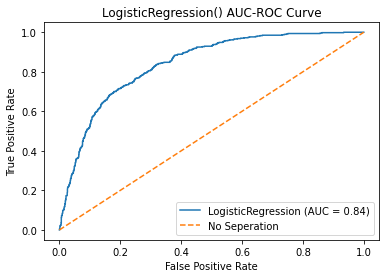

In [16]:
# Base Logit AUC-ROC curve
plot_aucroc_curve(logit,X_sc_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.64      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



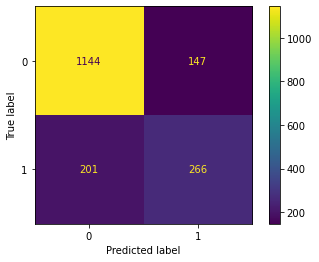

In [17]:
print(classification_report(y_eng_test,eng_preds))
eng_cm = confusion_matrix(y_eng_test,eng_preds)
ConfusionMatrixDisplay(confusion_matrix=eng_cm, display_labels = eng_logit.classes_).plot();

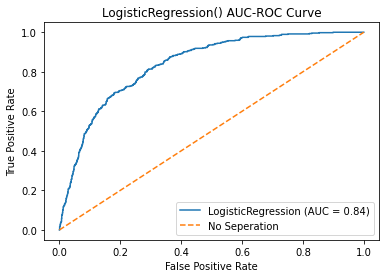

In [18]:
#Feature Engineered Logit AUC-ROC Curve
plot_aucroc_curve(eng_logit,X_sc_eng_test,y_eng_test)

Though we have the option to tune our model, a quick gridsearch will reveal that our defaults actually produce the best result.

In [19]:
#Gridsearch Parameters
logit_params = {
    'penalty':['l1','l2'],
    'class_weight':['balanced',None],
    'solver':['lbfgs','liblinear','']
}

In [20]:
logit_best = GridSearchCV(LogisticRegression(), logit_params,cv=10,verbose=0,n_jobs=3).fit(X_sc_train,y_train);
print(f'Our best parameters: {logit_best.best_params_}')
print(f'Out best score: {round(logit_best.best_score_,3)}')

Our best parameters: {'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Out best score: 0.804


While it looks like our defaults are the best for our basic logit model, let us see if the same holds true for our feature engineered model.

In [21]:
eng_logit_best = GridSearchCV(LogisticRegression(), logit_params,cv=10,verbose=0,n_jobs=3).fit(X_sc_eng_train,y_eng_train);
print(f'Our best parameters: {eng_logit_best.best_params_}')
print(f'Out best score: {round(eng_logit_best.best_score_,3)}')

Our best parameters: {'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Out best score: 0.801


Looks like we can make some adjustments. Let's see how that affects the model's performance.

Training Accuracy: 80.05%
Testing Accuracy: 80.15%


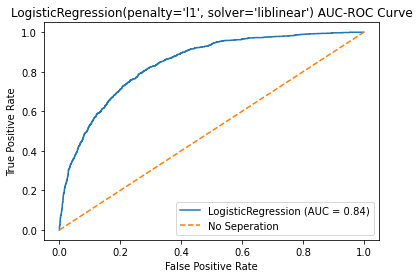

In [22]:
tuned_eng_logit = LogisticRegression(penalty='l1',solver='liblinear')
tuned_eng_logit.fit(X_sc_eng_train,y_eng_train)
print(f'Training Accuracy: {tuned_eng_logit.score(X_sc_eng_train,y_eng_train):.2%}')
print(f'Testing Accuracy: {tuned_eng_logit.score(X_sc_eng_test,y_eng_test):.2%}')
plot_aucroc_curve(tuned_eng_logit,X_sc_eng_train,y_eng_train)

And our confusion matrix

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.64      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



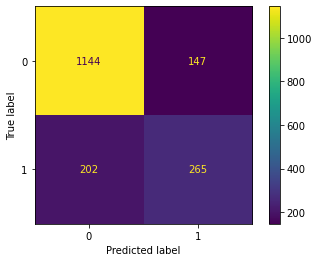

In [23]:
preds = tuned_eng_logit.predict(X_sc_eng_test)
print(classification_report(y_eng_test,preds))
cm = confusion_matrix(y_eng_test,preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = tuned_eng_logit.classes_).plot();

## KNearest Neighbors

The next model we are going to look at is a K-Nearest Neighbors model. This model uses the closet observations around the point we are trying to predict in order to classify our prediction.

In [24]:
#KNearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_sc_train,y_train)

KNeighborsClassifier()

In [25]:
#Engineered KNN
eng_knn = KNeighborsClassifier()
eng_knn.fit(X_sc_eng_train,y_eng_train)

KNeighborsClassifier()

In [26]:
#Generate Predictions
preds=knn.predict(X_sc_test)
eng_preds = eng_knn.predict(X_sc_eng_test)

Training Score: 83.67%
Test Score: 75.03%

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1291
           1       0.53      0.54      0.53       467

    accuracy                           0.75      1758
   macro avg       0.68      0.68      0.68      1758
weighted avg       0.75      0.75      0.75      1758



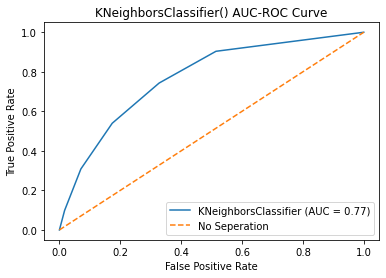

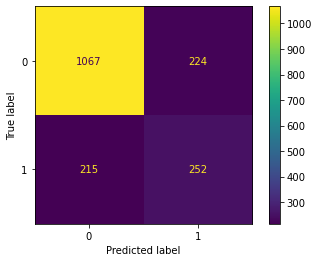

In [27]:
#Accuracy Scores
print(f'Training Score: {knn.score(X_sc_train,y_train):.2%}')
print(f'Test Score: {knn.score(X_sc_test,y_test):.2%}')
print()

#AUC-ROC Curve
plot_aucroc_curve(knn,X_sc_test,y_test)

#Confusion Matrix
print(classification_report(y_test,preds))
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = knn.classes_).plot();

Engineered Training Accuracy: 83.92%
Engineered Testing Accuracy: 76.28%

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1291
           1       0.56      0.51      0.54       467

    accuracy                           0.76      1758
   macro avg       0.69      0.68      0.69      1758
weighted avg       0.76      0.76      0.76      1758



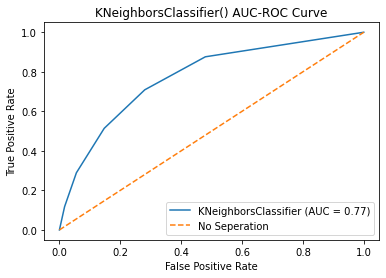

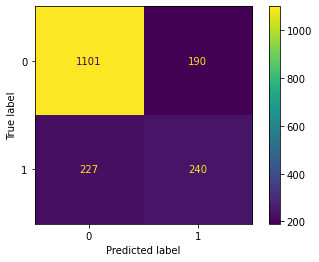

In [28]:
#Feature Engineered Accuracy Scores
print(f'Engineered Training Accuracy: {eng_knn.score(X_sc_eng_train,y_eng_train):.2%}')
print(f'Engineered Testing Accuracy: {eng_knn.score(X_sc_eng_test,y_eng_test):.2%}')
print()

#Feature Engineered AUC-ROC Curve
plot_aucroc_curve(eng_knn,X_sc_eng_test,y_eng_test)

#Feature Engineered Confusion Matrix
print(classification_report(y_eng_test,eng_preds))
cm = confusion_matrix(y_eng_test,eng_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = eng_knn.classes_).plot();

One of the first things we notice, is that our model performed worse than our logistic regression. Both of our models are overfit, though our feature engineered model is less so. Let's take a look at tuning some of our parameters to see if we can close that performance gap.

In [29]:
#KNearest Neighbors Parameter Dictionary
knn_params = {
    'n_neighbors':range(10,101,10),
    'weights':['uniform','distance'],
    'p':[1,2]}

In [30]:
#GridSearch
knn_best = GridSearchCV(KNeighborsClassifier(), knn_params,cv=10,verbose=1, n_jobs=3).fit(X_sc_train,y_train);
print(f'Our best parameters: {knn_best.best_params_}')
print(f'Out best score: {round(knn_best.best_score_,3)}')

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done 382 tasks      | elapsed:   14.9s


Our best parameters: {'n_neighbors': 40, 'p': 1, 'weights': 'uniform'}
Out best score: 0.795


[Parallel(n_jobs=3)]: Done 400 out of 400 | elapsed:   15.7s finished


In [31]:
eng_knn_best = GridSearchCV(KNeighborsClassifier(), knn_params, cv=10, verbose=1, n_jobs=3).fit(X_sc_eng_train,y_eng_train)
print(f'Our best parameters: {eng_knn_best.best_params_}')
print(f'Out best score: {round(eng_knn_best.best_score_,3)}')

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 146 tasks      | elapsed:    2.3s


Our best parameters: {'n_neighbors': 80, 'p': 1, 'weights': 'uniform'}
Out best score: 0.794


[Parallel(n_jobs=3)]: Done 400 out of 400 | elapsed:    7.6s finished


We can see that even with our gridsearch, we didn't see much improvement in our model. Let's instantiate a fresh model and fit it one last time to see our final training and test scores.

Training Score: 80.38%
Test Score: 78.78%

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1291
           1       0.61      0.57      0.59       467

    accuracy                           0.79      1758
   macro avg       0.73      0.72      0.72      1758
weighted avg       0.78      0.79      0.79      1758



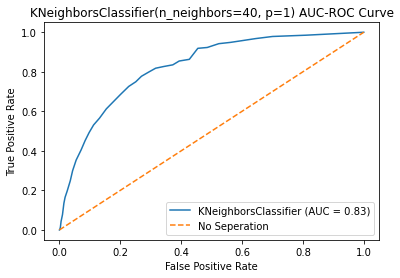

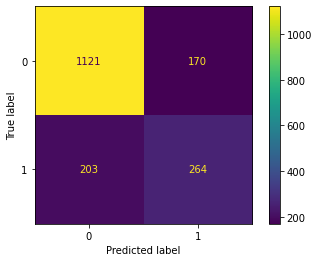

In [32]:
tuned_knn = KNeighborsClassifier(n_neighbors=40,p=1)
tuned_knn.fit(X_sc_train,y_train)
preds = tuned_knn.predict(X_sc_test)

#Accuracy Scores
print(f'Training Score: {tuned_knn.score(X_sc_train,y_train):.2%}')
print(f'Test Score: {tuned_knn.score(X_sc_test,y_test):.2%}')
print()

plot_aucroc_curve(tuned_knn,X_sc_test,y_test)


print(classification_report(y_test,preds))
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = tuned_knn.classes_).plot();

Engineered Training Accuracy: 79.83%
Engineered Testing Accuracy: 78.38%

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1291
           1       0.61      0.53      0.57       467

    accuracy                           0.78      1758
   macro avg       0.72      0.70      0.71      1758
weighted avg       0.78      0.78      0.78      1758



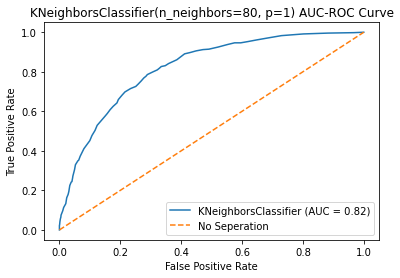

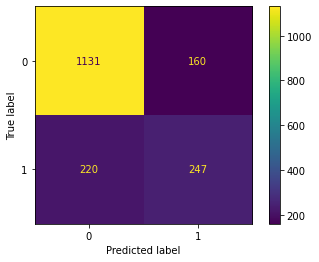

In [33]:
tuned_eng_knn = KNeighborsClassifier(n_neighbors=80,p=1)
tuned_eng_knn.fit(X_sc_eng_train,y_eng_train)
eng_preds = tuned_eng_knn.predict(X_sc_eng_test)

print(f'Engineered Training Accuracy: {tuned_eng_knn.score(X_sc_eng_train,y_eng_train):.2%}')
print(f'Engineered Testing Accuracy: {tuned_eng_knn.score(X_sc_eng_test,y_eng_test):.2%}')
print()
#Feature Engineered AUC-ROC Curve
plot_aucroc_curve(tuned_eng_knn,X_sc_eng_test,y_eng_test)

#Feature Engineered Confusion Matrix
print(classification_report(y_eng_test,eng_preds))
cm = confusion_matrix(y_eng_test,eng_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = tuned_eng_knn.classes_).plot();

It is much clearer with our KNearest Neighbors models that gridsearching improved their predictive abilities. Still, they fall just shy of out performing our Logitstic Regression models.

## Support Vector Machine (SVM)
The final model we are going to examine our churn dataset with is a support vector machine. Support vector machines are very powerful models that generally perform very well. Let's take a look and see!

In [34]:
# Instantiate SVM.
svc = SVC()

#Fit
svc.fit(X_sc_train,y_train)

#Generate Predictions
preds=svc.predict(X_sc_test)

In [35]:
#Accuracy Scores
print(f'Training Score: {svc.score(X_sc_train,y_train):.2%}')
print(f'Test Score: {svc.score(X_sc_test,y_test):.2%}')

Training Score: 81.82%
Test Score: 80.03%


Already we can see that this is scoring comparitive to our logistic regression model.

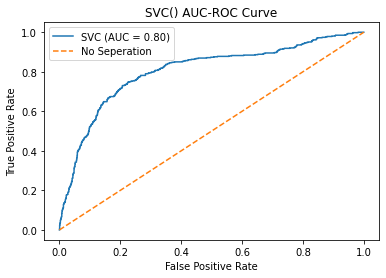

In [36]:
plot_aucroc_curve(svc,X_sc_test,y_test)

A noticably worse AUC but let's see what our confusion matrix shows us before moving on to our feature engineered model.

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.66      0.52      0.58       467

    accuracy                           0.80      1758
   macro avg       0.75      0.71      0.73      1758
weighted avg       0.79      0.80      0.79      1758



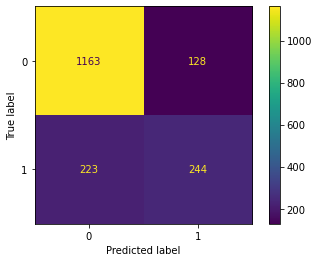

In [37]:
print(classification_report(y_test,preds))
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = svc.classes_).plot();

Something to make note of is the low presence of false positives from this model. If we were trying to minimize Type I errors, we would actually want to use this model over our Logit models as it has the lowest so far.

Engineered Training Accuracy: 80.72%
Engineered Testing Accuracy: 79.24%

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1291
           1       0.65      0.48      0.55       467

    accuracy                           0.79      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758



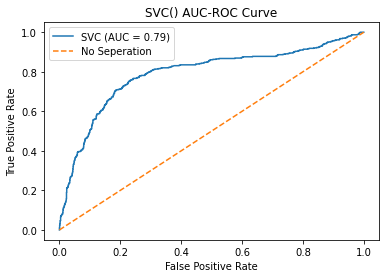

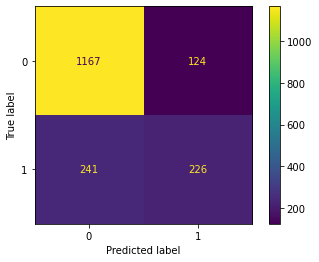

In [38]:
#Instantiate
eng_svc = SVC()

#Fit
eng_svc.fit(X_sc_eng_train,y_eng_train)

#Predict
eng_preds = eng_svc.predict(X_sc_eng_test)

#Feature Engineered Accuracy Scores
print(f'Engineered Training Accuracy: {eng_svc.score(X_sc_eng_train,y_eng_train):.2%}')
print(f'Engineered Testing Accuracy: {eng_svc.score(X_sc_eng_test,y_eng_test):.2%}')
print()

#Feature Engineered AUC-ROC Curve
plot_aucroc_curve(eng_svc,X_sc_eng_test,y_eng_test)

#Feature Engineered Confusion Matrix
print(classification_report(y_eng_test,eng_preds))
cm = confusion_matrix(y_eng_test,eng_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = eng_svc.classes_).plot();

Our feature engineering actually caused our SVM to perform worse! Let's gridsearch over both of these to pull out the best model we can.

In [39]:
svc_params = {
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'gamma':['scale','auto'],
    'class_weight':['balanced',None],
    'break_ties':[True,False]
}

In [40]:
#GridSearch
svc_best = GridSearchCV(SVC(), svc_params,cv=10,verbose=1, n_jobs=3).fit(X_sc_train,y_train);
print(f'Our best parameters: {svc_best.best_params_}')
print(f'Out best score: {round(svc_best.best_score_,3)}')

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   10.9s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   45.7s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  3.1min
[Parallel(n_jobs=3)]: Done 800 out of 800 | elapsed:  3.1min finished


Our best parameters: {'C': 0.6, 'break_ties': True, 'class_weight': None, 'gamma': 'scale'}
Out best score: 0.804


Training Accuracy: 81.82%
Testing Accuracy: 80.03%

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.66      0.52      0.58       467

    accuracy                           0.80      1758
   macro avg       0.75      0.71      0.73      1758
weighted avg       0.79      0.80      0.79      1758



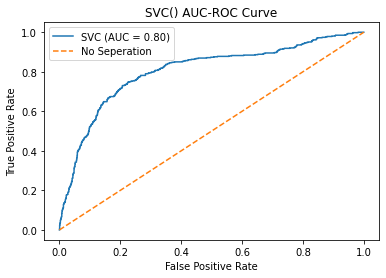

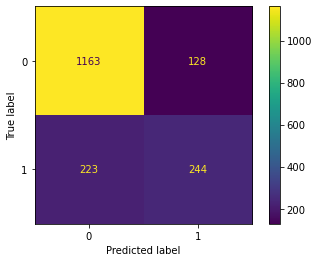

In [41]:
#Instantiate
tuned_svc = SVC()

#Fit
tuned_svc.fit(X_sc_train,y_train)

#Predict
preds = tuned_svc.predict(X_sc_test)

#Accuracy Scores
print(f'Training Accuracy: {tuned_svc.score(X_sc_train,y_train):.2%}')
print(f'Testing Accuracy: {tuned_svc.score(X_sc_test,y_test):.2%}')
print()

#AUC-ROC Curve
plot_aucroc_curve(tuned_svc,X_sc_test,y_test)

#Confusion Matrix
print(classification_report(y_test,preds))
cm = confusion_matrix(y_test,preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = tuned_svc.classes_).plot();

Unfortunately it looks like even with an extensive gridsearch, we aren't seeing much improvement from our SVM. Let's see what effects our feature engineering has on our models.

In [42]:
#Feature Engineered GridSearch
eng_svc_best = GridSearchCV(SVC(),svc_params,cv=10,verbose=1,n_jobs=3).fit(X_sc_eng_train,y_eng_train)
print(f'Our best parameters: {eng_svc_best.best_params_}')
print(f'Out best score: {round(eng_svc_best.best_score_,3)}')

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    7.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   30.4s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.2min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  2.1min
[Parallel(n_jobs=3)]: Done 800 out of 800 | elapsed:  2.1min finished


Our best parameters: {'C': 0.5, 'break_ties': True, 'class_weight': None, 'gamma': 'scale'}
Out best score: 0.798


Engineered Training Accuracy: 80.72%
Engineered Testing Accuracy: 79.24%

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1291
           1       0.65      0.48      0.55       467

    accuracy                           0.79      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758



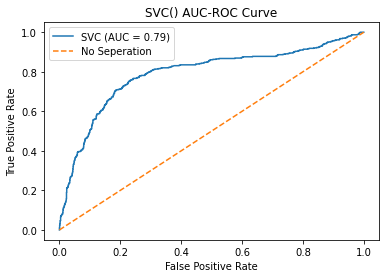

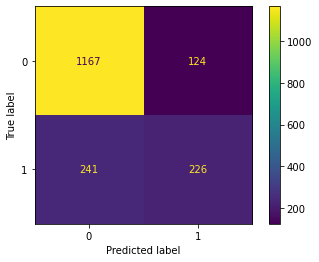

In [43]:
#Instantiate
tuned_eng_svc = SVC()

#Fit
tuned_eng_svc.fit(X_sc_eng_train,y_eng_train)

#Predict
tuned_eng_preds = tuned_eng_svc.predict(X_sc_eng_test)

#Feature Engineered Accuracy Scores
print(f'Engineered Training Accuracy: {tuned_eng_svc.score(X_sc_eng_train,y_eng_train):.2%}')
print(f'Engineered Testing Accuracy: {tuned_eng_svc.score(X_sc_eng_test,y_eng_test):.2%}')
print()

#Feature Engineered AUC-ROC Curve
plot_aucroc_curve(tuned_eng_svc,X_sc_eng_test,y_eng_test)

#Feature Engineered Confusion Matrix
print(classification_report(y_eng_test,tuned_eng_preds))
cm = confusion_matrix(y_eng_test,tuned_eng_preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = tuned_eng_svc.classes_).plot();

## Conclusions

We can see some limitations in our dataset as we explored different modeling techniques. Without a more robust dataset, like one generated through synthetic data, we are limited in both model preformance, and the insights we can gleam. Through our analysis of tenure, we know we should prioritize customer contact during the first 12 months of service, as this is when the majority of our churn takes place.

Additionally, we should examine the account details of the senior citizen customers who have churned over the last quarter to expand upon our findings regarding that demographic, as they are a major indicator of churn.

Streaming services is our lowest performing service, which may be due to competition like Netflix and Hulu. We should do a cost analysis on maintaining our Streaming services going forward, focusing on whether or not the generated revenue long-term justify's any short-term improvements we have planned.

Prioritize customer contact during the first 12 months, regardless of contract type, but especially if they are on month-to-month.